# Imports

In [38]:
import Cell_BLAST as cb
cb.config.N_JOBS = 4
cb.config.RANDOM_SEED = 0

import time
import warnings 
warnings.filterwarnings("ignore")

import tensorflow as tf
tf.logging.set_verbosity(0)

In [120]:
import anndata
import scanpy as sc
import h5py
import pandas as pd
from glob import glob

In [5]:
!pwd

/home/ubuntu/code/kmer-hashing/kh-sample-cleaning


Unzip tar.gz file and place in a folder

In [6]:
!tar -xvzf /home/ubuntu/data/kmer/hematopoeisis/Quake_Smart-seq2_Bone_Marrow.tar.gz\
-C ~/data/kmer/hematopoeisis

Quake_Smart-seq2_Bone_Marrow/
Quake_Smart-seq2_Bone_Marrow/ref.h5
Quake_Smart-seq2_Bone_Marrow/model_0/
Quake_Smart-seq2_Bone_Marrow/model_0/weights/
Quake_Smart-seq2_Bone_Marrow/model_0/weights/latent/
Quake_Smart-seq2_Bone_Marrow/model_0/weights/latent/save.ckpt.meta
Quake_Smart-seq2_Bone_Marrow/model_0/weights/latent/checkpoint
Quake_Smart-seq2_Bone_Marrow/model_0/weights/latent/save.ckpt.data-00000-of-00001
Quake_Smart-seq2_Bone_Marrow/model_0/weights/latent/save.ckpt.index
Quake_Smart-seq2_Bone_Marrow/model_0/weights/prob/
Quake_Smart-seq2_Bone_Marrow/model_0/weights/prob/save.ckpt.meta
Quake_Smart-seq2_Bone_Marrow/model_0/weights/prob/checkpoint
Quake_Smart-seq2_Bone_Marrow/model_0/weights/prob/save.ckpt.data-00000-of-00001
Quake_Smart-seq2_Bone_Marrow/model_0/weights/prob/save.ckpt.index
Quake_Smart-seq2_Bone_Marrow/model_0/weights/rmbatch/
Quake_Smart-seq2_Bone_Marrow/model_0/weights/rmbatch/donor/
Quake_Smart-seq2_Bone_Marrow/model_0/weights/rmbatch/donor/save.ckpt.meta
Quake_

In [80]:
glob('/home/ubuntu/data/kmer/hematopoeisis/*tar.gz')

['/home/ubuntu/data/kmer/hematopoeisis/ALIGNED_Homo_sapiens_Bone_Marrow.tar.gz',
 '/home/ubuntu/data/kmer/hematopoeisis/Dahlin_mutant.tar.gz',
 '/home/ubuntu/data/kmer/hematopoeisis/Quake_10x_Bone_Marrow.tar.gz',
 '/home/ubuntu/data/kmer/hematopoeisis/Dahlin_Smart-seq2.tar.gz',
 '/home/ubuntu/data/kmer/hematopoeisis/Dahlin_10x.tar.gz',
 '/home/ubuntu/data/kmer/hematopoeisis/ALIGNED_Mus_musculus_Bone_Marrow.tar.gz',
 '/home/ubuntu/data/kmer/hematopoeisis/Velten_Smart-seq2.tar.gz',
 '/home/ubuntu/data/kmer/hematopoeisis/Tusi.tar.gz',
 '/home/ubuntu/data/kmer/hematopoeisis/Quake_Smart-seq2_Bone_Marrow.tar.gz',
 '/home/ubuntu/data/kmer/hematopoeisis/Velten_QUARTZ-seq.tar.gz']

In [79]:
for fn in glob('/home/ubuntu/data/kmer/hematopoeisis/*tar.gz'):
    print(fn)
    !tar -xvzf $fn -C ~/data/kmer/hematopoeisis

/home/ubuntu/data/kmer/hematopoeisis/ALIGNED_Homo_sapiens_Bone_Marrow.tar.gz
ALIGNED_Homo_sapiens_Bone_Marrow/
ALIGNED_Homo_sapiens_Bone_Marrow/ref.h5
ALIGNED_Homo_sapiens_Bone_Marrow/model_0/
ALIGNED_Homo_sapiens_Bone_Marrow/model_0/weights/
ALIGNED_Homo_sapiens_Bone_Marrow/model_0/weights/latent/
ALIGNED_Homo_sapiens_Bone_Marrow/model_0/weights/latent/save.ckpt.meta
ALIGNED_Homo_sapiens_Bone_Marrow/model_0/weights/latent/checkpoint
ALIGNED_Homo_sapiens_Bone_Marrow/model_0/weights/latent/save.ckpt.data-00000-of-00001
ALIGNED_Homo_sapiens_Bone_Marrow/model_0/weights/latent/save.ckpt.index
ALIGNED_Homo_sapiens_Bone_Marrow/model_0/weights/prob/
ALIGNED_Homo_sapiens_Bone_Marrow/model_0/weights/prob/save.ckpt.meta
ALIGNED_Homo_sapiens_Bone_Marrow/model_0/weights/prob/checkpoint
ALIGNED_Homo_sapiens_Bone_Marrow/model_0/weights/prob/save.ckpt.data-00000-of-00001
ALIGNED_Homo_sapiens_Bone_Marrow/model_0/weights/prob/save.ckpt.index
ALIGNED_Homo_sapiens_Bone_Marrow/model_0/weights/rmbatch/
ALI

Dahlin_mutant/model_2/weights/prob/save.ckpt.index
Dahlin_mutant/model_2/config.json
Dahlin_mutant/stdout.txt
Dahlin_mutant/cell_type1.pdf
/home/ubuntu/data/kmer/hematopoeisis/Quake_10x_Bone_Marrow.tar.gz
Quake_10x_Bone_Marrow/
Quake_10x_Bone_Marrow/ref.h5
Quake_10x_Bone_Marrow/model_0/
Quake_10x_Bone_Marrow/model_0/weights/
Quake_10x_Bone_Marrow/model_0/weights/latent/
Quake_10x_Bone_Marrow/model_0/weights/latent/save.ckpt.meta
Quake_10x_Bone_Marrow/model_0/weights/latent/checkpoint
Quake_10x_Bone_Marrow/model_0/weights/latent/save.ckpt.data-00000-of-00001
Quake_10x_Bone_Marrow/model_0/weights/latent/save.ckpt.index
Quake_10x_Bone_Marrow/model_0/weights/prob/
Quake_10x_Bone_Marrow/model_0/weights/prob/save.ckpt.meta
Quake_10x_Bone_Marrow/model_0/weights/prob/checkpoint
Quake_10x_Bone_Marrow/model_0/weights/prob/save.ckpt.data-00000-of-00001
Quake_10x_Bone_Marrow/model_0/weights/prob/save.ckpt.index
Quake_10x_Bone_Marrow/model_0/weights/rmbatch/
Quake_10x_Bone_Marrow/model_0/weights/rm

Dahlin_10x/model_0/weights/prob/save.ckpt.index
Dahlin_10x/model_0/config.json
Dahlin_10x/cell_ontology_class.pdf
Dahlin_10x/peek.pdf
Dahlin_10x/model_1/
Dahlin_10x/model_1/weights/
Dahlin_10x/model_1/weights/latent/
Dahlin_10x/model_1/weights/latent/save.ckpt.meta
Dahlin_10x/model_1/weights/latent/checkpoint
Dahlin_10x/model_1/weights/latent/save.ckpt.data-00000-of-00001
Dahlin_10x/model_1/weights/latent/save.ckpt.index
Dahlin_10x/model_1/weights/prob/
Dahlin_10x/model_1/weights/prob/save.ckpt.meta
Dahlin_10x/model_1/weights/prob/checkpoint
Dahlin_10x/model_1/weights/prob/save.ckpt.data-00000-of-00001
Dahlin_10x/model_1/weights/prob/save.ckpt.index
Dahlin_10x/model_1/config.json
Dahlin_10x/index.h5
Dahlin_10x/self_projection.txt
Dahlin_10x/model_3/
Dahlin_10x/model_3/weights/
Dahlin_10x/model_3/weights/latent/
Dahlin_10x/model_3/weights/latent/save.ckpt.meta
Dahlin_10x/model_3/weights/latent/checkpoint
Dahlin_10x/model_3/weights/latent/save.ckpt.data-00000-of-00001
Dahlin_10x/model_3/

ALIGNED_Mus_musculus_Bone_Marrow/model_3/weights/rmbatch/quake_10x_bone_marrow_donor/checkpoint
ALIGNED_Mus_musculus_Bone_Marrow/model_3/weights/rmbatch/quake_10x_bone_marrow_donor/save.ckpt.data-00000-of-00001
ALIGNED_Mus_musculus_Bone_Marrow/model_3/weights/rmbatch/quake_10x_bone_marrow_donor/save.ckpt.index
ALIGNED_Mus_musculus_Bone_Marrow/model_3/weights/rmbatch/donor/
ALIGNED_Mus_musculus_Bone_Marrow/model_3/weights/rmbatch/donor/save.ckpt.meta
ALIGNED_Mus_musculus_Bone_Marrow/model_3/weights/rmbatch/donor/checkpoint
ALIGNED_Mus_musculus_Bone_Marrow/model_3/weights/rmbatch/donor/save.ckpt.data-00000-of-00001
ALIGNED_Mus_musculus_Bone_Marrow/model_3/weights/rmbatch/donor/save.ckpt.index
ALIGNED_Mus_musculus_Bone_Marrow/model_3/weights/rmbatch/quake_smart_seq2_bone_marrow_donor/
ALIGNED_Mus_musculus_Bone_Marrow/model_3/weights/rmbatch/quake_smart_seq2_bone_marrow_donor/save.ckpt.meta
ALIGNED_Mus_musculus_Bone_Marrow/model_3/weights/rmbatch/quake_smart_seq2_bone_marrow_donor/checkpoi

Tusi/potential.pdf
Tusi/model_3/
Tusi/model_3/weights/
Tusi/model_3/weights/latent/
Tusi/model_3/weights/latent/save.ckpt.meta
Tusi/model_3/weights/latent/checkpoint
Tusi/model_3/weights/latent/save.ckpt.data-00000-of-00001
Tusi/model_3/weights/latent/save.ckpt.index
Tusi/model_3/weights/prob/
Tusi/model_3/weights/prob/save.ckpt.meta
Tusi/model_3/weights/prob/checkpoint
Tusi/model_3/weights/prob/save.ckpt.data-00000-of-00001
Tusi/model_3/weights/prob/save.ckpt.index
Tusi/model_3/config.json
Tusi/index.pkz
Tusi/stderr.txt
Tusi/model_2/
Tusi/model_2/weights/
Tusi/model_2/weights/latent/
Tusi/model_2/weights/latent/save.ckpt.meta
Tusi/model_2/weights/latent/checkpoint
Tusi/model_2/weights/latent/save.ckpt.data-00000-of-00001
Tusi/model_2/weights/latent/save.ckpt.index
Tusi/model_2/weights/prob/
Tusi/model_2/weights/prob/save.ckpt.meta
Tusi/model_2/weights/prob/checkpoint
Tusi/model_2/weights/prob/save.ckpt.data-00000-of-00001
Tusi/model_2/weights/prob/save.ckpt.index
Tusi/model_2/config.j

# Data Exploration

In [103]:
PATH = '/home/ubuntu/data/kmer/hematopoeisis/'

In [124]:
data = cb.data.ExprDataSet.read_dataset(f"{PATH}/ALIGNED_Mus_musculus_Bone_Marrow/ref.h5")
data2 = cb.data.ExprDataSet.read_dataset(f"{PATH}/Dahlin_mutant/ref.h5")

In [111]:
data.obs

,cell_ontology_class,cell_ontology_id,cell_type1,channel,cluster,dataset_name,donor,free_annotation,gender,latent_1,...,latent_9,organ,organism,plate,platform,quake_10x_bone_marrow_donor,quake_smart_seq2_bone_marrow_donor,region,tSNE1,tSNE2
10X_P7_2_AAACCTGCAGTAACGG,monocyte,CL:0000576,monocyte,nan,0.0,Quake_10x_Bone_Marrow,3-F-56,,F,0.402541,...,-1.314232,Bone Marrow,Mus musculus,10X_P7_2,10x,3-F-56,nan,,18.206263,-76.891167
10X_P7_2_AAACGGGAGACCGGAT,T cell,CL:0000084,T cell,nan,9.0,Quake_10x_Bone_Marrow,3-F-56,,F,-2.021526,...,-0.751300,Bone Marrow,Mus musculus,10X_P7_2,10x,3-F-56,nan,,-58.434162,39.617722
10X_P7_2_AAACGGGAGCGCTCCA,T cell,CL:0000084,T cell,nan,9.0,Quake_10x_Bone_Marrow,3-F-56,,F,-1.293175,...,0.974334,Bone Marrow,Mus musculus,10X_P7_2,10x,3-F-56,nan,,-41.350662,35.346836
10X_P7_2_AAACGGGAGGACGAAA,granulocytopoietic cell,CL:0002191,granulocytopoietic cell,nan,3.0,Quake_10x_Bone_Marrow,3-F-56,,F,-0.073555,...,-1.443030,Bone Marrow,Mus musculus,10X_P7_2,10x,3-F-56,nan,,45.300446,-3.827852
10X_P7_2_AAACGGGAGGTACTCT,promonocyte,CL:0000559,promonocyte,nan,2.0,Quake_10x_Bone_Marrow,3-F-56,,F,-0.008875,...,-1.849002,Bone Marrow,Mus musculus,10X_P7_2,10x,3-F-56,nan,,28.716080,-42.765320
10X_P7_2_AAACGGGAGGTGCTTT,granulocyte,CL:0000094,granulocyte,nan,1.0,Quake_10x_Bone_Marrow,3-F-56,,F,2.154100,...,1.004798,Bone Marrow,Mus musculus,10X_P7_2,10x,3-F-56,nan,,-26.588514,-42.721539
10X_P7_2_AAACGGGAGTCGAGTG,granulocyte,CL:0000094,granulocyte,nan,5.0,Quake_10x_Bone_Marrow,3-F-56,,F,0.222586,...,-1.413822,Bone Marrow,Mus musculus,10X_P7_2,10x,3-F-56,nan,,24.377991,-10.855982
10X_P7_2_AAAGATGAGCTTCGCG,monocyte,CL:0000576,monocyte,nan,0.0,Quake_10x_Bone_Marrow,3-F-56,,F,1.186803,...,-1.054429,Bone Marrow,Mus musculus,10X_P7_2,10x,3-F-56,nan,,-1.415460,-60.869549
10X_P7_2_AAAGATGCACTGTTAG,granulocytopoietic cell,CL:0002191,granulocytopoietic cell,nan,3.0,Quake_10x_Bone_Marrow,3-F-56,,F,0.758886,...,-2.015391,Bone Marrow,Mus musculus,10X_P7_2,10x,3-F-56,nan,,66.655952,-13.899018
10X_P7_2_AAAGATGCATCCAACA,erythroblast,CL:0000765,erythroblast,nan,10.0,Quake_10x_Bone_Marrow,3-F-56,,F,-0.244903,...,-2.148652,Bone Marrow,Mus musculus,10X_P7_2,10x,3-F-56,nan,,-20.591175,61.292522


In [81]:
glob('/home/ubuntu/data/kmer/hematopoeisis/*/ref.h5')

['/home/ubuntu/data/kmer/hematopoeisis/ALIGNED_Mus_musculus_Bone_Marrow/ref.h5',
 '/home/ubuntu/data/kmer/hematopoeisis/Dahlin_mutant/ref.h5',
 '/home/ubuntu/data/kmer/hematopoeisis/Quake_10x_Bone_Marrow/ref.h5',
 '/home/ubuntu/data/kmer/hematopoeisis/ALIGNED_Homo_sapiens_Bone_Marrow/ref.h5',
 '/home/ubuntu/data/kmer/hematopoeisis/Tusi/ref.h5',
 '/home/ubuntu/data/kmer/hematopoeisis/Dahlin_10x/ref.h5',
 '/home/ubuntu/data/kmer/hematopoeisis/Velten_Smart-seq2/ref.h5',
 '/home/ubuntu/data/kmer/hematopoeisis/Quake_Smart-seq2_Bone_Marrow/ref.h5',
 '/home/ubuntu/data/kmer/hematopoeisis/Dahlin_Smart-seq2/ref.h5']

In [118]:
for data in glob('/home/ubuntu/data/kmer/hematopoeisis/*/ref.h5'):
    cb_obj = cb.data.ExprDataSet.read_dataset(data)
    print(f"{set(cb_obj.obs.dataset_name)} : {cb_obj.obs.shape}")
    
    print((cb_obj.obs.columns))
    print("")

{'Quake_10x_Bone_Marrow', 'Quake_Smart-seq2_Bone_Marrow'} : (8689, 28)
Index(['cell_ontology_class', 'cell_ontology_id', 'cell_type1', 'channel',
       'cluster', 'dataset_name', 'donor', 'free_annotation', 'gender',
       'latent_1', 'latent_10', 'latent_2', 'latent_3', 'latent_4', 'latent_5',
       'latent_6', 'latent_7', 'latent_8', 'latent_9', 'organ', 'organism',
       'plate', 'platform', 'quake_10x_bone_marrow_donor',
       'quake_smart_seq2_bone_marrow_donor', 'region', 'tSNE1', 'tSNE2'],
      dtype='object')

{'Dahlin_mutant'} : (13815, 19)
Index(['UMAP1', 'UMAP2', 'cell_ontology_class', 'cell_ontology_id',
       'cell_type1', 'dataset_name', 'latent_1', 'latent_10', 'latent_2',
       'latent_3', 'latent_4', 'latent_5', 'latent_6', 'latent_7', 'latent_8',
       'latent_9', 'organ', 'organism', 'platform'],
      dtype='object')

{'Quake_10x_Bone_Marrow'} : (3652, 25)
Index(['cell_ontology_class', 'cell_ontology_id', 'cell_type1', 'cluster',
       'dataset_name', 'don

In [147]:
print((data.obs.columns)), print((data2.obs.columns))

Index(['cell_ontology_class', 'cell_ontology_id', 'cell_type1', 'channel',
       'cluster', 'dataset_name', 'donor', 'free_annotation', 'gender',
       'latent_1', 'latent_10', 'latent_2', 'latent_3', 'latent_4', 'latent_5',
       'latent_6', 'latent_7', 'latent_8', 'latent_9', 'organ', 'organism',
       'plate', 'platform', 'quake_10x_bone_marrow_donor',
       'quake_smart_seq2_bone_marrow_donor', 'region', 'tSNE1', 'tSNE2'],
      dtype='object')
Index(['UMAP1', 'UMAP2', 'cell_ontology_class', 'cell_ontology_id',
       'cell_type1', 'dataset_name', 'latent_1', 'latent_10', 'latent_2',
       'latent_3', 'latent_4', 'latent_5', 'latent_6', 'latent_7', 'latent_8',
       'latent_9', 'organ', 'organism', 'platform'],
      dtype='object')


(None, None)

In [145]:
pd.concat([data.obs, data2.obs]).columnsumns

Index(['UMAP1', 'UMAP2', 'cell_ontology_class', 'cell_ontology_id',
       'cell_type1', 'channel', 'cluster', 'dataset_name', 'donor',
       'free_annotation', 'gender', 'latent_1', 'latent_10', 'latent_2',
       'latent_3', 'latent_4', 'latent_5', 'latent_6', 'latent_7', 'latent_8',
       'latent_9', 'organ', 'organism', 'plate', 'platform',
       'quake_10x_bone_marrow_donor', 'quake_smart_seq2_bone_marrow_donor',
       'region', 'tSNE1', 'tSNE2'],
      dtype='object')

In [219]:
metadata = pd.DataFrame()

for data in glob('/home/ubuntu/data/kmer/hematopoeisis/*/ref.h5'):
    cb_obj = cb.data.ExprDataSet.read_dataset(data)
    metadata = pd.concat([metadata, cb_obj.obs])
    print(set(cb_obj.obs.dataset_name))
    print(f'Added {len(cb_obj.obs)} cells to metadata')



{'Quake_10x_Bone_Marrow', 'Quake_Smart-seq2_Bone_Marrow'}
Added 8689 cells to metadata
{'Dahlin_mutant'}
Added 13815 cells to metadata
{'Quake_10x_Bone_Marrow'}
Added 3652 cells to metadata
{'Velten_QUARTZ-seq', 'Velten_Smart-seq2'}
Added 1414 cells to metadata
{'Tusi'}
Added 4763 cells to metadata
{'Dahlin_10x'}
Added 44802 cells to metadata
{'Velten_Smart-seq2'}
Added 1035 cells to metadata
{'Quake_Smart-seq2_Bone_Marrow'}
Added 5037 cells to metadata
{'Dahlin_Smart-seq2'}
Added 141 cells to metadata


In [156]:
metadata.columns

Index(['Ba', 'D', 'E', 'G', 'Ly', 'M', 'Meg', 'UMAP1', 'UMAP2', 'age', 'batch',
       'cell_ontology_class', 'cell_ontology_id', 'cell_type1', 'channel',
       'cluster', 'dataset_name', 'donor', 'free_annotation', 'gender',
       'latent_1', 'latent_10', 'latent_2', 'latent_3', 'latent_4', 'latent_5',
       'latent_6', 'latent_7', 'latent_8', 'latent_9', 'organ', 'organism',
       'plate', 'platform', 'potential', 'quake_10x_bone_marrow_donor',
       'quake_smart_seq2_bone_marrow_donor', 'region', 'tSNE1', 'tSNE2'],
      dtype='object')

In [203]:
len((metadata.index)),len(set(metadata.index))

(83348, 73624)

## Remove duplicated indexes

Missing the Velten_QUARTZ data set by itself so the duplicate indexes is not the sum of the ALIGNED datasets

In [217]:
83348-73624

9724

In [216]:
metadata[metadata.index.duplicated()]

,Ba,D,E,G,Ly,M,Meg,UMAP1,UMAP2,age,...,organ,organism,plate,platform,potential,quake_10x_bone_marrow_donor,quake_smart_seq2_bone_marrow_donor,region,tSNE1,tSNE2
10X_P7_2_AAACCTGCAGTAACGG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bone Marrow,Mus musculus,10X_P7_2,10x,NaN,NaN,NaN,,-27.045599,-44.263683
10X_P7_2_AAACGGGAGACCGGAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bone Marrow,Mus musculus,10X_P7_2,10x,NaN,NaN,NaN,,82.452019,7.060766
10X_P7_2_AAACGGGAGCGCTCCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bone Marrow,Mus musculus,10X_P7_2,10x,NaN,NaN,NaN,,77.908028,-3.704223
10X_P7_2_AAACGGGAGGACGAAA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bone Marrow,Mus musculus,10X_P7_2,10x,NaN,NaN,NaN,,-25.673075,28.301052
10X_P7_2_AAACGGGAGGTACTCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bone Marrow,Mus musculus,10X_P7_2,10x,NaN,NaN,NaN,,-3.605457,-33.641716
10X_P7_2_AAACGGGAGGTGCTTT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bone Marrow,Mus musculus,10X_P7_2,10x,NaN,NaN,NaN,,-66.766479,-22.005665
10X_P7_2_AAACGGGAGTCGAGTG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bone Marrow,Mus musculus,10X_P7_2,10x,NaN,NaN,NaN,,-49.547279,18.218695
10X_P7_2_AAAGATGAGCTTCGCG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bone Marrow,Mus musculus,10X_P7_2,10x,NaN,NaN,NaN,,-4.320248,-57.228756
10X_P7_2_AAAGATGCACTGTTAG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bone Marrow,Mus musculus,10X_P7_2,10x,NaN,NaN,NaN,,-18.424574,37.350895
10X_P7_2_AAAGATGCATCCAACA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bone Marrow,Mus musculus,10X_P7_2,10x,NaN,NaN,NaN,,3.878258,49.976521


In [223]:
metadata_unique = metadata[~metadata.index.duplicated(keep='last')]

In [225]:
!pwd

/home/ubuntu/code/kmer-hashing/kh-sample-cleaning


In [226]:
metadata.to_csv('/home/ubuntu/data/kmer/cb_hematopoesis.csv')

In [227]:
metadata_unique.to_csv('/home/ubuntu/data/kmer/cb_hematopoesis_unique.csv')

In [212]:
import matplotlib as plt

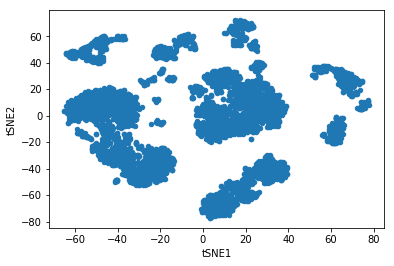

In [39]:
data.obs.plot(x='tSNE1', y='tSNE2', kind='scatter')